In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Desktop/Data/Concrete_Data.csv")

In [3]:
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Blast               1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
CA                  1030 non-null float64
FA                  1030 non-null float64
Age                 1030 non-null int64
CMS                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.shape

(1030, 9)

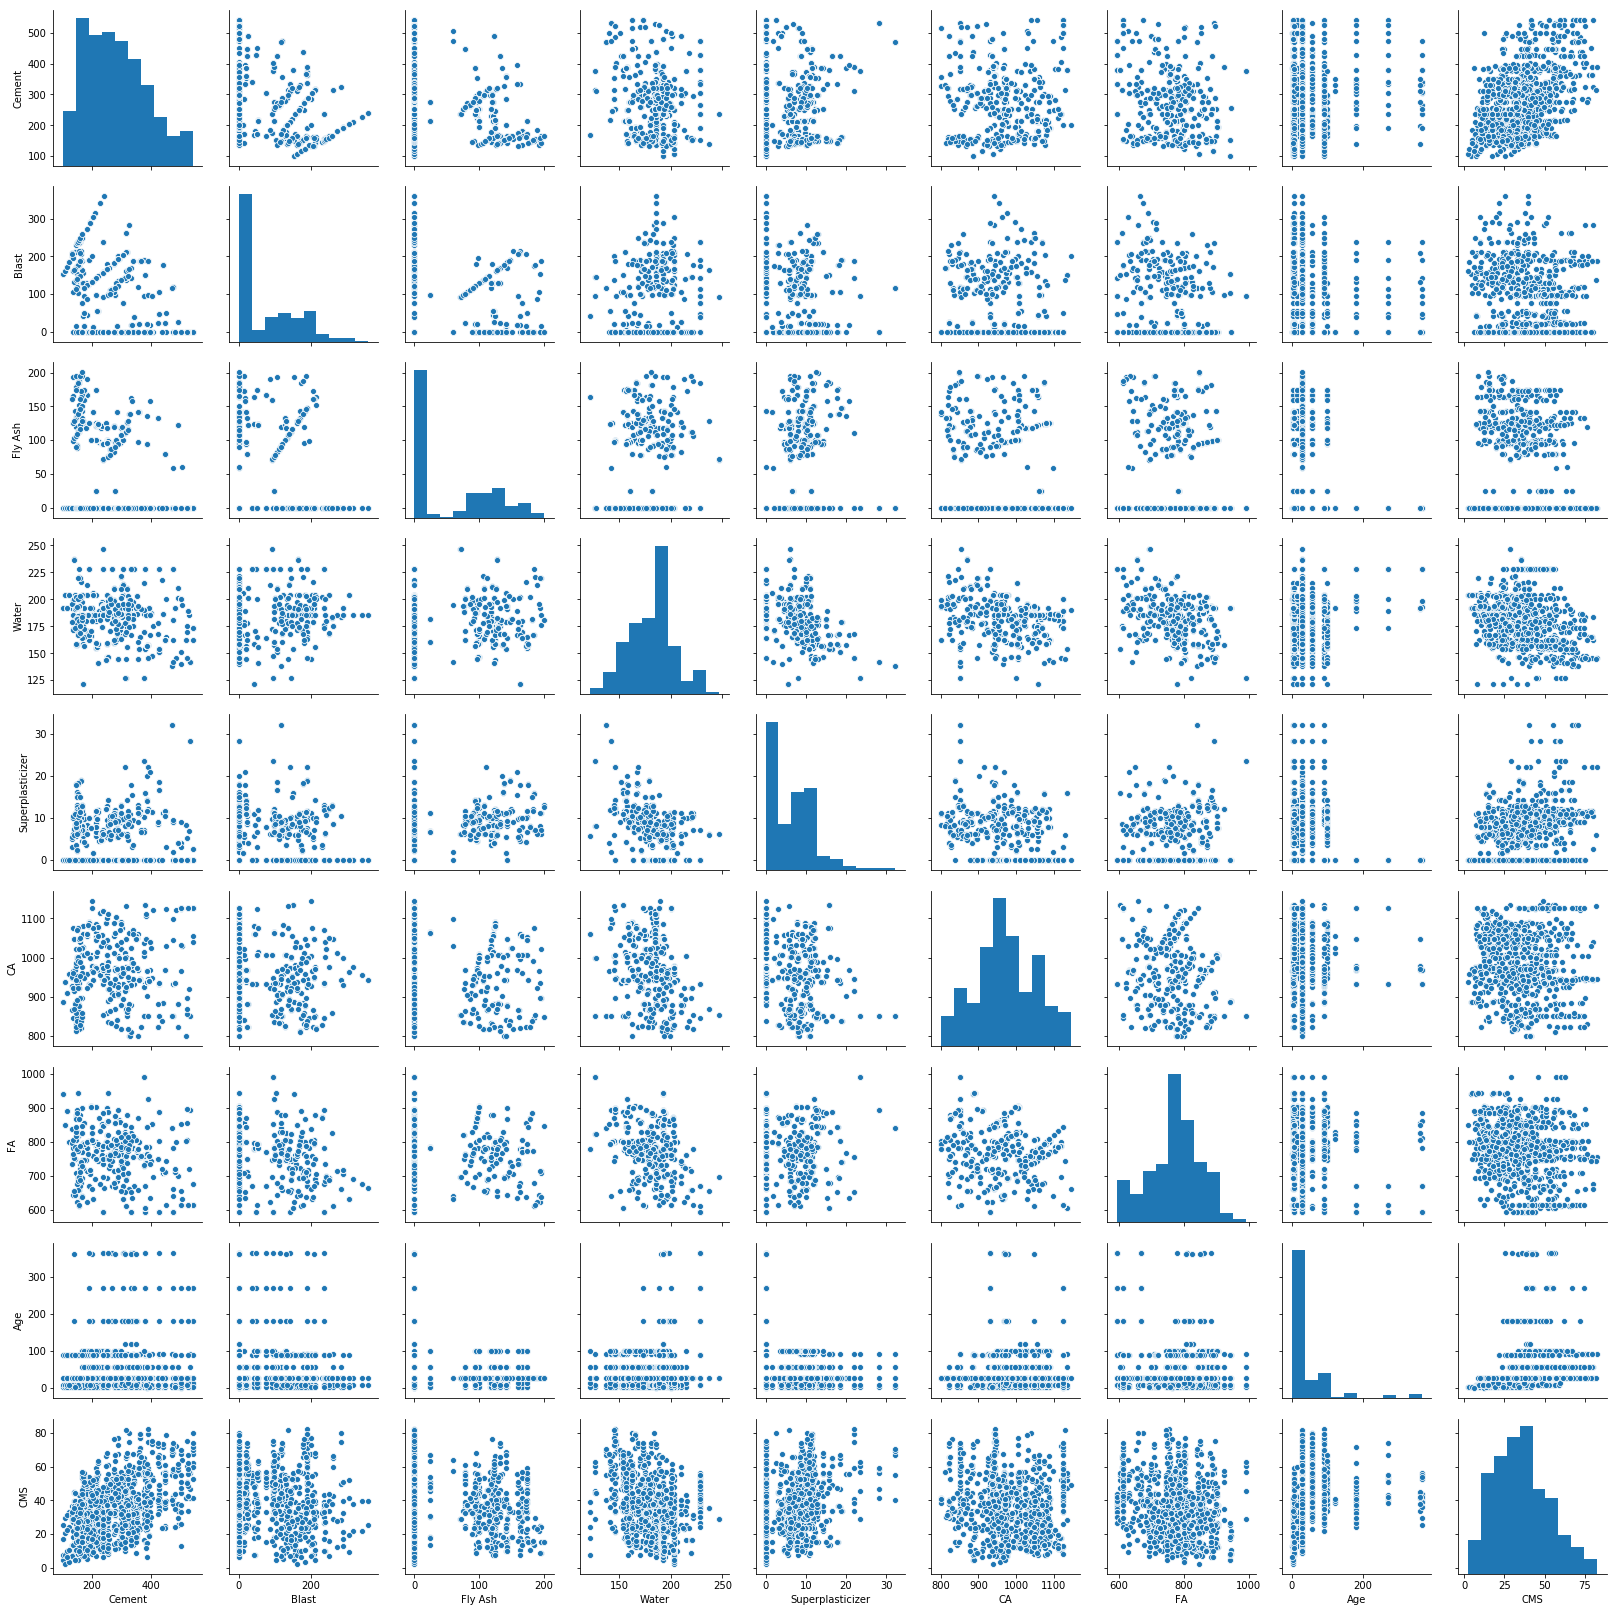

In [7]:
sns.pairplot(data)

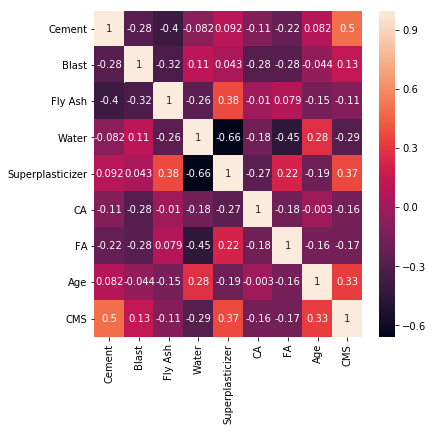

In [8]:
correlation = data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),color = "k", annot=True)

In [9]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [10]:
X.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
pred = lr.predict(X_test)
lr.score(X_train, y_train)

0.6066613439796213

In [14]:
lr.score(X_test, y_test)

0.6352987285077923

In [15]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE', metrics.mean_absolute_error(y_test,pred))
print('MSE', metrics.mean_squared_error(y_test,pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 7.775625710189037
MSE 93.61873598596341
RMSE 9.67567754660951


In [16]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()

In [17]:
xgr.fit(X_train, y_train)

[15:48:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [18]:
xgr.score(X_train, y_train)

0.9459934732388413

In [19]:
xgr.score(X_test, y_test)

0.8952190560239961